In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import equalize
from skimage.morphology import ball

import napari
%gui qt

In [37]:
def normalize_pixels(i):
    i = 256*(i/np.amax(i))
    return i.astype(np.uint8)

In [38]:
im = io.imread("classic.tif")

In [39]:
np.amin(im)

11463

In [40]:
viewer = napari.view_image(im)

In [6]:
im.shape

(11, 101, 101)

In [41]:
equalized_im = equalize(im, ball(25))

/Users/RyanLu/Documents/scikit-image/skimage/filters/rank/generic.py:186: UserWarning: Bad rank filter performance is expected due to a large number of bins (40852), equivalent to an approximate bitdepth of 15.3.
  out_dtype)


In [42]:
equalized_im = equalized_im - np.amin(equalized_im)

In [43]:
equalized_im = normalize_pixels(equalized_im)

In [44]:
viewer = napari.view_image(equalized_im)

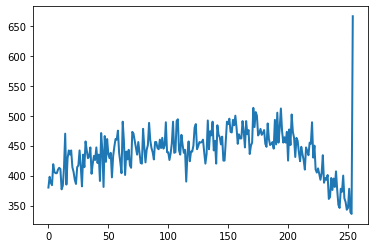

In [45]:
hist = np.histogram(equalized_im, bins=np.arange(0, 256))

plt.figure(1)
plt.plot(hist[1][:-1], hist[0], lw = 2)

In [46]:
thresholded = equalized_im > 200

In [47]:
viewer = napari.view_image(thresholded)

In [11]:
from skimage.morphology import remove_small_objects

In [48]:
thresholded_filtered = remove_small_objects(thresholded, min_size = 200)

In [49]:
v = napari.view_image(thresholded_filtered)

In [50]:
x = np.ma.array(equalized_im, mask = ~thresholded_filtered)

In [51]:
viewer = napari.view_image(x)